In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import shutil
import sys

# Adjusting Target Labels

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1,Index
0,EE while helping the children clean up after l...,Fall Or Slip Injury,Lower Extremities,"Fall, Slip or Trip Injury",Lower Extremities,577
1,Clmt was putting bread trays on bottom of brea...,NaN,NaN,Burn or Scald - Heat or Cold Exposures - Conta...,Neck,1867
2,He got off of he forklift and did not secure p...,"Motor Vehicle, NOC","Foot-Metatarsals, Heel excl Ankle or Toe",Motor Vehicle,Lower Extremities,3530
3,slammed left finger in closet,Struck Or Injured By,Upper Extremities,Struck or Injured by,Upper Extremities,583
4,the employee was digging a tre; strain; lower ...,NaN,NaN,Strain or Injury by,Trunk,1711
...,...,...,...,...,...,...
3913,R WRIST/HAND SPRAIN: EE WAS STACKING CONRETE P...,SPRAIN,WRIST (S) AND HAND (S),Strain or Injury by,Upper Extremities,3730
3914,"EE was providing services to a client, when th...",Struck or Injured By - Fellow Worker / Patient,Arm Lower,Struck or Injured by,Upper Extremities,3687
3915,Strain or injury by pushing or pulling,Strain or injury by pushing or pulling,Shoulder(s),Strain or Injury by,Upper Extremities,4463
3916,Fall-Misc,Fall-Misc,Knee,"Fall, Slip or Trip Injury",Lower Extremities,4846


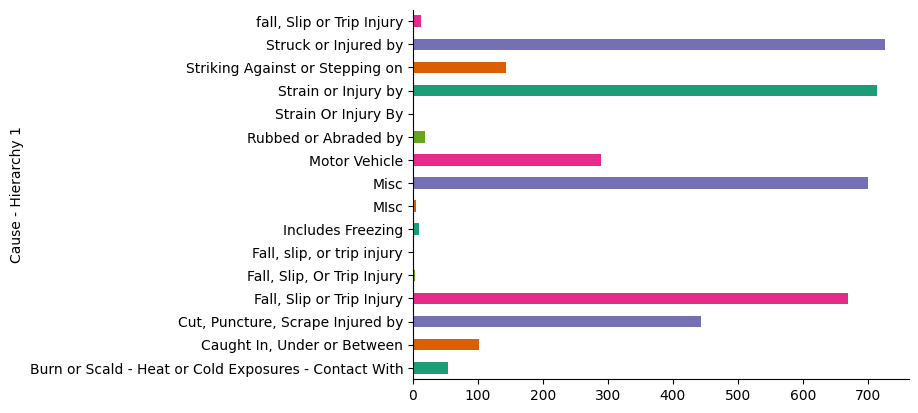

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Cause - Hierarchy 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# Print unique values of 'Column1'
unique_values = train_df['Cause - Hierarchy 1'].unique()

print(unique_values)

['Fall, Slip or Trip Injury'
 'Burn or Scald - Heat or Cold Exposures - Contact With' 'Motor Vehicle'
 'Struck or Injured by' 'Strain or Injury by' 'Misc'
 'Striking Against or Stepping on' 'fall, Slip or Trip Injury'
 'Fall, Slip, Or Trip Injury' 'Cut, Puncture, Scrape Injured by'
 'Caught In, Under or Between' 'Rubbed or Abraded by' 'Includes Freezing'
 nan 'MIsc' 'Fall, slip, or trip injury' 'Strain Or Injury By']


In [7]:
replace_dict = {'Fall, slip, or trip injury': 'Fall, Slip or Trip Injury', 'fall, Slip or Trip Injury': 'Fall, Slip or Trip Injury',
                'Fall, Slip, Or Trip Injury': 'Fall, Slip or Trip Injury', 'Strain Or Injury By': 'Strain or Injury by', 'MIsc': 'Misc'}

# Replace multiple values in 'Column1' using the dictionary
train_df['Cause - Hierarchy 1'] = train_df['Cause - Hierarchy 1'].replace(replace_dict)

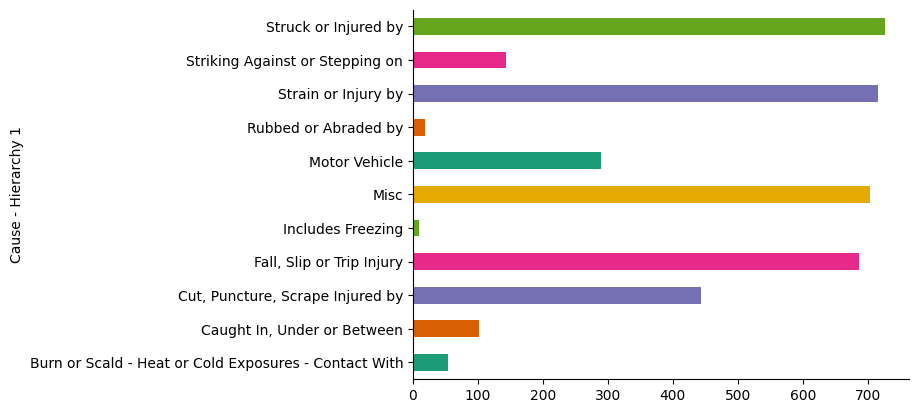

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Cause - Hierarchy 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
replace_dict = {'Includes Freezing': 'Misc', 'Rubbed or Abraded by': 'Misc',
                'Burn or Scald - Heat or Cold Exposures - Contact With': 'Misc',
                'Caught In, Under or Between': 'Caught In', 'Cut, Puncture, Scrape Injured by': 'Cut or Puncture, Scrape Injured by'}

# Replace multiple values in 'Column1' using the dictionary
train_df['Cause - Hierarchy 1'] = train_df['Cause - Hierarchy 1'].replace(replace_dict)

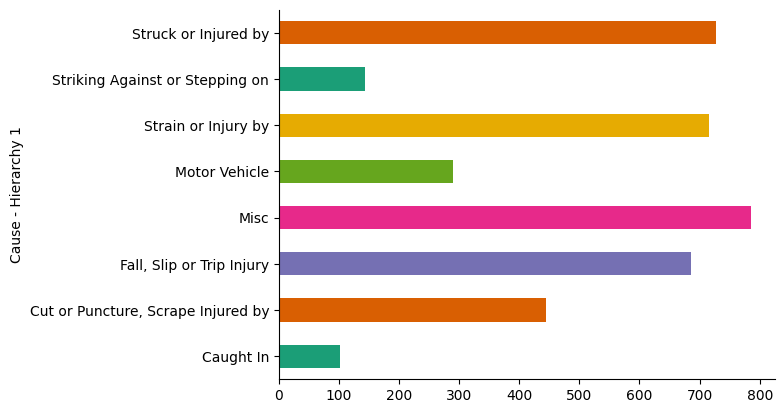

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Cause - Hierarchy 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LossDescription          3886 non-null   object
 1   ResultingInjuryDesc      2489 non-null   object
 2   PartInjuredDesc          1922 non-null   object
 3   Cause - Hierarchy 1      3892 non-null   object
 4   Body Part - Hierarchy 1  3659 non-null   object
 5   Index                    3918 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 183.8+ KB


In [12]:
fill='Misc'
train_df['Cause - Hierarchy 1'].fillna(fill, inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LossDescription          3886 non-null   object
 1   ResultingInjuryDesc      2489 non-null   object
 2   PartInjuredDesc          1922 non-null   object
 3   Cause - Hierarchy 1      3918 non-null   object
 4   Body Part - Hierarchy 1  3659 non-null   object
 5   Index                    3918 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 183.8+ KB


# Text Preprocessing
## **filling missing values, lowercasing, equal spacing, removing punctuation, removing numerical values, correcting spelling errors, removal of stopwords & lemmatization**

In [18]:
train_df['LossDescription'].count() # total non-null values
train_df['LossDescription'].isnull().sum()
train_df.dropna(subset=['LossDescription'], inplace=True)

In [19]:
train_df['LossDescription'].isnull().sum()

0

In [20]:
replacement_values = {
    'ResultingInjuryDesc': str(0),
    'PartInjuredDesc': str(0),
}
train_df.fillna(replacement_values, inplace=True)

In [21]:
# combining 'title' and 'abstract' column to get more context
train_df['Description'] = train_df['LossDescription'] + "." + train_df['ResultingInjuryDesc'].astype(str) + "." + train_df['PartInjuredDesc'].astype(str)

In [22]:
# dropping useless features/columns
train_df.drop(labels=['LossDescription', 'ResultingInjuryDesc', 'PartInjuredDesc', 'Index', 'Body Part - Hierarchy 1'], axis=1, inplace=True)

In [23]:
train_df.columns

Index(['Cause - Hierarchy 1', 'Description'], dtype='object')

In [24]:
# rearranging columns
train_df = train_df[['Description', 'Cause - Hierarchy 1']]
train_df

,Description,Cause - Hierarchy 1
0,EE while helping the children clean up after l...,"Fall, Slip or Trip Injury"
1,Clmt was putting bread trays on bottom of brea...,Misc
2,He got off of he forklift and did not secure p...,Motor Vehicle
3,slammed left finger in closet.Struck Or Injure...,Struck or Injured by
4,the employee was digging a tre; strain; lower ...,Strain or Injury by
...,...,...
3913,R WRIST/HAND SPRAIN: EE WAS STACKING CONRETE P...,Strain or Injury by
3914,"EE was providing services to a client, when th...",Struck or Injured by
3915,Strain or injury by pushing or pulling.Strain ...,Strain or Injury by
3916,Fall-Misc.Fall-Misc.Knee,"Fall, Slip or Trip Injury"


In [25]:
train_df.describe()

,Description,Cause - Hierarchy 1
count,3886,3886
unique,3509,8
top,Struck/Injured By Noc.Struck/Injured By Noc.0,Misc
freq,37,800


In [26]:
# Find all duplicate rows
duplicate_mask = train_df.duplicated(keep=False)

# Filter and show all duplicate rows
duplicate_rows = train_df[duplicate_mask]
print(duplicate_rows)

                                            Description  \
9     Slip Same Level Ice/Snow Contributing.Slip Sam...   
12    Hit By-Falling/ Flying Object.Hit By-Falling/ ...   
13    Overuse/Overexertion Noc.Overuse/Overexertion ...   
14      Foreign 30 Body In Eye.Foreign 30 Body In Eye.0   
29    Strain back while lifting.STRAIN OR INJURY BY-...   
...                                                 ...   
3884  Acute Trauma - Pushing/Pulling Object.Acute Tr...   
3885  Absorption - Caustic/Noxious/Toxic Substance.A...   
3900   Foreign Body (In Eye).Foreign Body (In Eye).Eyes   
3902  Fall, slip, or trip injury from different leve...   
3916                           Fall-Misc.Fall-Misc.Knee   

            Cause - Hierarchy 1  
9     Fall, Slip or Trip Injury  
12         Struck or Injured by  
13                         Misc  
14                         Misc  
29          Strain or Injury by  
...                         ...  
3884        Strain or Injury by  
3885               

In [27]:
train_df.drop_duplicates(subset=['Description'], inplace=True)
train_df

<ipython-input-27-fe08fa8cfce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop_duplicates(subset=['Description'], inplace=True)


,Description,Cause - Hierarchy 1
0,EE while helping the children clean up after l...,"Fall, Slip or Trip Injury"
1,Clmt was putting bread trays on bottom of brea...,Misc
2,He got off of he forklift and did not secure p...,Motor Vehicle
3,slammed left finger in closet.Struck Or Injure...,Struck or Injured by
4,the employee was digging a tre; strain; lower ...,Strain or Injury by
...,...,...
3912,IW was assisting client in the bathroom with a...,Struck or Injured by
3913,R WRIST/HAND SPRAIN: EE WAS STACKING CONRETE P...,Strain or Injury by
3914,"EE was providing services to a client, when th...",Struck or Injured by
3915,Strain or injury by pushing or pulling.Strain ...,Strain or Injury by


In [28]:
train_df.describe()

,Description,Cause - Hierarchy 1
count,3509,3509
unique,3509,8
top,Employee states he works in the bottom of home...,Misc
freq,1,675


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3917
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Description          3509 non-null   object
 1   Cause - Hierarchy 1  3509 non-null   object
dtypes: object(2)
memory usage: 82.2+ KB


In [30]:
name_list = train_df['Cause - Hierarchy 1'].unique().tolist()
name_list

['Fall, Slip or Trip Injury',
 'Misc',
 'Motor Vehicle',
 'Struck or Injured by',
 'Strain or Injury by',
 'Striking Against or Stepping on',
 'Cut or Puncture, Scrape Injured by',
 'Caught In']

In [31]:
# Convert 'Categories' column into one-hot encoded columns with custom column names
df_onehot = train_df['Cause - Hierarchy 1'].str.get_dummies(sep=', ').rename(columns={'Slip or Trip Injury': 'Slip or Trip Injury',
                                                                                     'Scrape Injured by': 'Scrape Injured by',
                                                                                     'Misc': 'Misc',
                                                                                     'Fall': 'Fall',
                                                                                     'Motor Vehicle': 'Motor Vehicle', 'Struck or Injured by': 'Struck or Injured by',
                                                                                     'Strain or Injury by' : 'Strain or Injury by',
                                                                                     'Striking Against or Stepping on': 'Striking Against or Stepping on',
                                                                                     'Cut or Puncture' : 'Cut or Puncture',
                                                                                     'Caught In' : 'Caught In'})

# Concatenate the one-hot encoded columns with the original DataFrame
train_df = pd.concat([train_df, df_onehot], axis=1)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Description                      3509 non-null   object
 1   Cause - Hierarchy 1              3509 non-null   object
 2   Caught In                        3509 non-null   int64 
 3   Cut or Puncture                  3509 non-null   int64 
 4   Fall                             3509 non-null   int64 
 5   Misc                             3509 non-null   int64 
 6   Motor Vehicle                    3509 non-null   int64 
 7   Scrape Injured by                3509 non-null   int64 
 8   Slip or Trip Injury              3509 non-null   int64 
 9   Strain or Injury by              3509 non-null   int64 
 10  Striking Against or Stepping on  3509 non-null   int64 
 11  Struck or Injured by             3509 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 3

In [33]:
train_df.drop('Cause - Hierarchy 1', axis=1, inplace=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3917
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Description                      3509 non-null   object
 1   Caught In                        3509 non-null   int64 
 2   Cut or Puncture                  3509 non-null   int64 
 3   Fall                             3509 non-null   int64 
 4   Misc                             3509 non-null   int64 
 5   Motor Vehicle                    3509 non-null   int64 
 6   Scrape Injured by                3509 non-null   int64 
 7   Slip or Trip Injury              3509 non-null   int64 
 8   Strain or Injury by              3509 non-null   int64 
 9   Striking Against or Stepping on  3509 non-null   int64 
 10  Struck or Injured by             3509 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 329.0+ KB


In [35]:
train_df

,Description,Caught In,Cut or Puncture,Fall,Misc,Motor Vehicle,Scrape Injured by,Slip or Trip Injury,Strain or Injury by,Striking Against or Stepping on,Struck or Injured by
0,EE while helping the children clean up after l...,0,0,1,0,0,0,1,0,0,0
1,Clmt was putting bread trays on bottom of brea...,0,0,0,1,0,0,0,0,0,0
2,He got off of he forklift and did not secure p...,0,0,0,0,1,0,0,0,0,0
3,slammed left finger in closet.Struck Or Injure...,0,0,0,0,0,0,0,0,0,1
4,the employee was digging a tre; strain; lower ...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3912,IW was assisting client in the bathroom with a...,0,0,0,0,0,0,0,0,0,1
3913,R WRIST/HAND SPRAIN: EE WAS STACKING CONRETE P...,0,0,0,0,0,0,0,1,0,0
3914,"EE was providing services to a client, when th...",0,0,0,0,0,0,0,0,0,1
3915,Strain or injury by pushing or pulling.Strain ...,0,0,0,0,0,0,0,1,0,0


In [36]:
#lowercasing
train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [37]:
# Function to add spacing between words and after punctuations

import re
def add_spacing_after_punctuation(text, spacing=" "):
    # Split text using regular expression to include punctuation as separate tokens
    words = re.findall(r'\w+|[^\w\s]', text)
    spaced_text = spacing.join(words)
    return spaced_text

# Apply the function to remove punctuation from 'Text' column
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].apply(add_spacing_after_punctuation)

In [38]:
# Function to remove punctuation

import string
def remove_punctuation(text):
    # Using string.punctuation to get all punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to remove punctuation from 'Text' column
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].apply(remove_punctuation)

In [39]:
# Function to remove digits

def remove_digits(text):
    return text.replace(r'\d+', '', regex=True)

# Apply the function to columns with string data
train_df[train_df.select_dtypes(include='object').columns] = train_df.select_dtypes(include='object').apply(lambda x: x.str.replace(r'\d+', '', regex=True))


In [40]:
# spelling correction
from textblob import TextBlob

train_df['Description']= train_df['Description'].apply(lambda x: str(TextBlob(x).correct()))

In [41]:
# removing stopwords

import nltk
nltk.download('stopwords')

import pandas as pd
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)

    return " ".join(new_text)

# Applying the function to the DataFrame
train_df['Description'] = train_df['Description'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3917
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Description                      3509 non-null   object
 1   Caught In                        3509 non-null   int64 
 2   Cut or Puncture                  3509 non-null   int64 
 3   Fall                             3509 non-null   int64 
 4   Misc                             3509 non-null   int64 
 5   Motor Vehicle                    3509 non-null   int64 
 6   Scrape Injured by                3509 non-null   int64 
 7   Slip or Trip Injury              3509 non-null   int64 
 8   Strain or Injury by              3509 non-null   int64 
 9   Striking Against or Stepping on  3509 non-null   int64 
 10  Struck or Injured by             3509 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 329.0+ KB


In [44]:
train_df.columns

Index(['Description', 'Caught In', 'Cut or Puncture', 'Fall', 'Misc',
       'Motor Vehicle', 'Scrape Injured by', 'Slip or Trip Injury',
       'Strain or Injury by', 'Striking Against or Stepping on',
       'Struck or Injured by'],
      dtype='object')

In [45]:
train_df

,Description,Caught In,Cut or Puncture,Fall,Misc,Motor Vehicle,Scrape Injured by,Slip or Trip Injury,Strain or Injury by,Striking Against or Stepping on,Struck or Injured by
0,help children clean lunch slip piece leg injur...,0,0,1,0,0,0,1,0,0,0
1,clot put bread ray bottom bread rack cause rac...,0,0,0,1,0,0,0,0,0,0
2,get forklift secure park brake hit shift arm c...,0,0,0,0,1,0,0,0,0,0
3,slam leave finger closet strike injure upper e...,0,0,0,0,0,0,0,0,0,1
4,employee dig strain lower back injury push pull,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3912,assist client bathroom another caregiver strai...,0,0,0,0,0,0,0,0,0,1
3913,r wrist hand sprain stick concrete park block ...,0,0,0,0,0,0,0,1,0,0
3914,provide service client client reach another cl...,0,0,0,0,0,0,0,0,0,1
3915,strain injury push pull strain injury push pul...,0,0,0,0,0,0,0,1,0,0


In [46]:
# Specify the columns for which you want to get the values
target_list = ['Caught In', 'Cut or Puncture', 'Fall', 'Misc',
       'Motor Vehicle', 'Scrape Injured by', 'Slip or Trip Injury',
       'Strain or Injury by', 'Striking Against or Stepping on',
       'Struck or Injured by']

# Obtain values of selected columns as a list of lists
values_list = train_df[target_list].values.tolist()
print(len(values_list))

3509


# **Fine-Tuning BERT-base Model**

In [47]:
!nvidia-smi

Tue Apr  9 01:34:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [48]:
!pip install transformers

In [49]:
from transformers import BertTokenizer, BertModel

In [50]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [55]:
token_lens=[]

for desc in train_df['Description']:
  tokens= tokenizer.encode(desc)
  token_lens.append(len(tokens))

In [56]:
len(token_lens)

3509

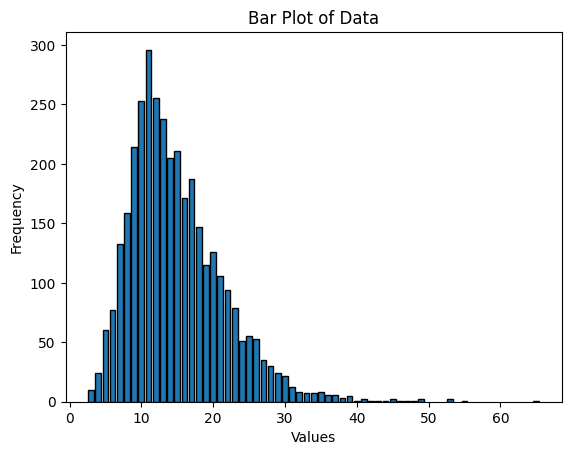

Mode of the data: 11


In [58]:
import matplotlib.pyplot as plt
from collections import Counter


# Count occurrences of each value
counter = Counter(token_lens)

# Separate values and counts
values = list(counter.keys())
counts = list(counter.values())

# Create a bar plot
plt.bar(values, counts, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Data')
plt.show()

# Find the mode (value with highest frequency)
mode_value = values[counts.index(max(counts))]
print("Mode of the data:", mode_value)

In [59]:
# from the bar plot, we can take max_length as 35, as mostly after them are outliers
# hyperparameters
MAX_LEN = 35
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 1e-05

In [60]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = df['Description']
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,   # [CLS], [PAD], [SEP] Tokens
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }

In [61]:
from sklearn.model_selection import train_test_split

# Define train_size (0.8 for 80% train, 20% test)
train_size = 0.8

# Perform train-test split
train_df, val_df = train_test_split(train_df, test_size=1-train_size, random_state=200)

# Reset index for both DataFrames
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)

In [62]:
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

In [63]:
# PyTorch Dataloader

train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [64]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [65]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [66]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True) # here, it will return tensors of pooler & sequence o/p,
                                                                                           # but we need only pooler one.
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 10) # as we have 10 multi-labels

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output) # we only need pooler o/p
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [67]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [68]:
val_targets=[]
val_outputs=[]

In [69]:
def train_model(n_epochs, training_loader, validation_loader, model,
                optimizer, checkpoint_path, best_model_path):

  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf


  for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)

    print('############# Epoch {}: Training End     #############'.format(epoch))

    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################
    # validate the model #
    ######################

    model.eval()

    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))

      # create checkpoint variable and add important data
      checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
      }

        # save checkpoint
      save_ckp(checkpoint, False, checkpoint_path, best_model_path)

      ## TODO: save the model if validation loss has decreased
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        # save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss

    print('############# Epoch {}  Done   #############\n'.format(epoch))

  return model

In [70]:
ckpt_path = "/content/drive/MyDrive/pitbit/curr_model.pt"
best_model_path = "/content/drive/MyDrive/pitbit/best_model.pt"

In [71]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer, ckpt_path, best_model_path)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Avgerage Training Loss: 0.005202 	Average Validation Loss: 0.015782
Validation loss decreased (inf --> 0.015782).  Saving model ...
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Avgerage Training Loss: 0.003615 	Average Validation Loss: 0.012151
Validation loss decreased (0.015782 --> 0.012151).  Saving model ...
############# Epoch 2  Done   #############

############# Epoch 3: Training Start   #############
############# Epoch 3: Training End     #############
############# Epoch 3: Validation Start   #############
############# Epo

In [72]:
train_df

,Description,Caught In,Cut or Puncture,Fall,Misc,Motor Vehicle,Scrape Injured by,Slip or Trip Injury,Strain or Injury by,Striking Against or Stepping on,Struck or Injured by
0,acute trauma lift object acute trauma lift object,0,0,0,0,0,0,0,1,0,0
1,fasten front bow strap strike lever push objec...,0,0,0,0,0,0,0,0,0,1
2,client bite staff leave hand release independe...,0,1,0,0,0,1,0,0,0,0
3,employee restrain resident fracture right foot...,0,0,0,0,0,0,0,1,0,0
4,crush injury middle finger catch object handle,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2802,strain injury strain injury abdomen,0,0,0,0,0,0,0,1,0,0
2803,foreign matter leave eye get debris leave eye eye,0,0,0,1,0,0,0,0,0,0
2804,object lift handle object lift handle wrist hand,0,1,0,0,0,1,0,0,0,0
2805,injuries injuries multiple body part,0,0,0,1,0,0,0,0,0,0


# **Evaluating on Test Dataset**

In [73]:
test_df=pd.read_csv('/content/drive/MyDrive/test.csv')
test_df

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1,Index
0,NaN,NaN,Thumb,NaN,NaN,5
1,NaN,NaN,Lower Arm,NaN,NaN,17
2,NaN,NaN,Abdomen,NaN,NaN,20
3,EE was getting out of the truck and twisted he...,NaN,NaN,NaN,NaN,47
4,Worker was making a delivery and her right han...,NaN,NaN,NaN,NaN,48
...,...,...,...,...,...,...
430,Struck/Injured By Noc,Struck/Injured By Noc,NaN,NaN,NaN,4804
431,Struck/Injured By Noc,Struck/Injured By Noc,NaN,NaN,NaN,4808
432,Other/ Unk,Other/ Unk,Elbow,NaN,NaN,4839
433,Hit By-Falling/ Flying Object,Hit By-Falling/ Flying Object,Finger(S),NaN,NaN,4845


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LossDescription          432 non-null    object 
 1   ResultingInjuryDesc      273 non-null    object 
 2   PartInjuredDesc          228 non-null    object 
 3   Cause - Hierarchy 1      0 non-null      float64
 4   Body Part - Hierarchy 1  0 non-null      float64
 5   Index                    435 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 20.5+ KB


In [75]:
test_df['LossDescription'].count() # total non-null values
test_df['LossDescription'].isnull().sum()

3

In [77]:
replacement_values = {
    'LossDescription': str(0),
    'ResultingInjuryDesc': str(0),
    'PartInjuredDesc': str(0),
}
test_df.fillna(replacement_values, inplace=True)

In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LossDescription          435 non-null    object 
 1   ResultingInjuryDesc      435 non-null    object 
 2   PartInjuredDesc          435 non-null    object 
 3   Cause - Hierarchy 1      0 non-null      float64
 4   Body Part - Hierarchy 1  0 non-null      float64
 5   Index                    435 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 20.5+ KB


In [79]:
# combining 'title' and 'abstract' column to get more context
test_df['Description'] = test_df['LossDescription'] + "." + test_df['ResultingInjuryDesc'].astype(str) + "." + test_df['PartInjuredDesc'].astype(str)

In [80]:
# dropping useless features/columns
test_df.drop(labels=['LossDescription', 'ResultingInjuryDesc', 'PartInjuredDesc', 'Index', 'Body Part - Hierarchy 1'], axis=1, inplace=True)

In [81]:
# rearranging columns
test_df = test_df[['Description', 'Cause - Hierarchy 1']]
test_df

,Description,Cause - Hierarchy 1
0,0.0.Thumb,NaN
1,0.0.Lower Arm,NaN
2,0.0.Abdomen,NaN
3,EE was getting out of the truck and twisted he...,NaN
4,Worker was making a delivery and her right han...,NaN
...,...,...
430,Struck/Injured By Noc.Struck/Injured By Noc.0,NaN
431,Struck/Injured By Noc.Struck/Injured By Noc.0,NaN
432,Other/ Unk.Other/ Unk.Elbow,NaN
433,Hit By-Falling/ Flying Object.Hit By-Falling/ ...,NaN


In [82]:
#lowercasing
test_df = test_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          435 non-null    object 
 1   Cause - Hierarchy 1  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [84]:
# Function to add spacing between words and after punctuations

import re
def add_spacing_after_punctuation(text, spacing=" "):
    # Split text using regular expression to include punctuation as separate tokens
    words = re.findall(r'\w+|[^\w\s]', text)
    spaced_text = spacing.join(words)
    return spaced_text

# Apply the function to remove punctuation from 'Text' column
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = test_df[col].apply(add_spacing_after_punctuation)

In [85]:
# Function to remove punctuation

import string
def remove_punctuation(text):
    # Using string.punctuation to get all punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to remove punctuation from 'Text' column
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = test_df[col].apply(remove_punctuation)

In [86]:
# Function to remove digits

def remove_digits(text):
    return text.replace(r'\d+', '', regex=True)

# Apply the function to columns with string data
test_df[test_df.select_dtypes(include='object').columns] = test_df.select_dtypes(include='object').apply(lambda x: x.str.replace(r'\d+', '', regex=True))


In [87]:
# spelling correction
from textblob import TextBlob

test_df['Description']= test_df['Description'].apply(lambda x: str(TextBlob(x).correct()))

In [88]:
# removing stopwords

import nltk
nltk.download('stopwords')

import pandas as pd
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)

    return " ".join(new_text)

# Applying the function to the DataFrame
test_df['Description'] = test_df['Description'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)

for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = test_df[col].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
test_df

,Description,Cause - Hierarchy 1
0,thumb,NaN
1,lower arm,NaN
2,abdomen,NaN
3,get truck twist right ankle,NaN
4,worker make delivery right hand bite dog,NaN
...,...,...
430,strike injure strike injure,NaN
431,strike injure strike injure,NaN
432,sink sink elbow,NaN
433,hit fall fly object hit fall fly object finger,NaN


In [91]:
example = test_df['Description'][1]
example

'lower arm'

# **Loading Fine-Tuned Model for Evaluation**

In [92]:
import torch
# Call the load_ckp function
# model, optimizer, epoch, valid_loss_min = load_ckp(best_model_path, model, optimizer)

checkpoint = torch.load('/content/drive/MyDrive/pitbit/best_model.pt', map_location=device)

model.load_state_dict(checkpoint['state_dict'])
epoch= checkpoint['epoch']

model.to(device).eval()
print(f'Successfully Loaded The Best Model, achieved on Epoch {epoch-1}')

Successfully Loaded The Best Model, achieved on Epoch 5


In [132]:
# Predictions on test.csv file

pred_list=[]
for idx, desc in enumerate(test_df['Description']):
  temp_list=[]

  encodings = tokenizer.encode_plus(
      desc,
      None,
      add_special_tokens=True,
      max_length=35,
      padding='max_length',
      return_token_type_ids=True,
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt'
  )


  model.eval()
  with torch.no_grad():
      input_ids = encodings['input_ids'].to(device, dtype=torch.long)
      attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
      token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)

      output = model(input_ids, attention_mask, token_type_ids)

      final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
      final_output = np.array(final_output)
      final_output = np.round(final_output, 4)

 #print(final_output)
  target_list = ['Caught In', 'Cut or Puncture', 'Fall', 'Misc',
    'Motor Vehicle', 'Scrape Injured by', 'Slip or Trip Injury',
    'Strain or Injury by', 'Striking Against or Stepping on',
    'Struck or Injured by']


  # Get the indices of values greater than 0.5

  classification_threshold = 0.5
  indices = np.argwhere(final_output > classification_threshold)

  indices= indices.tolist()
  for value in indices:
    temp_list.append(target_list[value[1]])

  if(len(indices)==0):
    indices= np.argmax(final_output)
    temp_list.append(target_list[indices])

  pred_list.append(temp_list)

In [133]:
print(len(pred_list))
type(pred_list)

435


list

In [134]:
pred_list

[['Misc'],
 ['Misc'],
 ['Misc'],
 ['Strain or Injury by'],
 ['Scrape Injured by'],
 ['Struck or Injured by'],
 ['Strain or Injury by'],
 ['Strain or Injury by'],
 ['Misc'],
 ['Motor Vehicle'],
 ['Misc'],
 ['Strain or Injury by'],
 ['Fall', 'Slip or Trip Injury'],
 ['Misc'],
 ['Misc'],
 ['Cut or Puncture', 'Scrape Injured by'],
 ['Strain or Injury by'],
 ['Cut or Puncture', 'Scrape Injured by'],
 ['Cut or Puncture', 'Scrape Injured by'],
 ['Struck or Injured by'],
 ['Fall', 'Slip or Trip Injury'],
 ['Misc'],
 ['Fall', 'Slip or Trip Injury'],
 ['Strain or Injury by'],
 ['Misc'],
 ['Strain or Injury by'],
 ['Strain or Injury by'],
 ['Motor Vehicle'],
 ['Strain or Injury by'],
 ['Fall', 'Slip or Trip Injury'],
 ['Cut or Puncture', 'Scrape Injured by'],
 ['Fall', 'Slip or Trip Injury'],
 ['Fall', 'Slip or Trip Injury'],
 ['Misc'],
 ['Struck or Injured by'],
 ['Fall', 'Slip or Trip Injury'],
 ['Struck or Injured by'],
 ['Struck or Injured by'],
 ['Motor Vehicle'],
 ['Struck or Injured by'],


In [98]:
import pandas as pd

# Input data
filename = "/content/drive/MyDrive/test.csv"

column_to_update = "Cause - Hierarchy 1"
# To fill Predicted Values in the Column

df = pd.read_csv(filename)

# Update the desired column
df[column_to_update] = pred_list

# Write back to the CSV file
df.to_csv(filename, index=False)

print("CSV file updated successfully.")

CSV file updated successfully.
